In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

In [9]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
train_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-05-22,318.89,20450750,315.77,319.23,315.3500
1,2020-05-21,316.85,25672210,318.66,320.89,315.8700
2,2020-05-20,319.23,27876220,316.68,319.52,316.2000
3,2020-05-19,313.14,25432390,315.03,318.52,313.0100
4,2020-05-18,314.96,33843130,313.17,316.50,310.3241


In [11]:
training_set = train_data.iloc[: , 3:4].values

In [12]:
training_set

array([[315.77  ],
       [318.66  ],
       [316.68  ],
       [315.03  ],
       [313.17  ],
       [300.35  ],
       [304.51  ],
       [312.15  ],
       [317.83  ],
       [308.1   ],
       [305.64  ],
       [303.22  ],
       [300.46  ],
       [295.06  ],
       [289.17  ],
       [286.25  ],
       [289.96  ],
       [284.73  ],
       [285.08  ],
       [281.8   ],
       [277.2   ],
       [275.87  ],
       [273.61  ],
       [276.28  ],
       [277.95  ],
       [284.69  ],
       [287.38  ],
       [282.4   ],
       [280.    ],
       [268.31  ],
       [268.7   ],
       [262.74  ],
       [270.8   ],
       [250.9   ],
       [242.8   ],
       [240.34  ],
       [246.5   ],
       [255.6   ],
       [250.74  ],
       [252.75  ],
       [246.52  ],
       [250.75  ],
       [236.36  ],
       [228.08  ],
       [247.18  ],
       [247.385 ],
       [239.77  ],
       [247.51  ],
       [241.95  ],
       [264.89  ],
       [255.94  ],
       [277.39  ],
       [277.

In [13]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [14]:
training_data_scaled.shape

(1000, 1)

In [15]:
X_train = []
y_train = []

for i in range(60, 1000):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Building Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True,
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
modelo = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0516
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0067
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0044
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0047
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0036
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0039
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0039
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0037
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0027
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0027
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0031
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0030
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0028
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0030
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/st

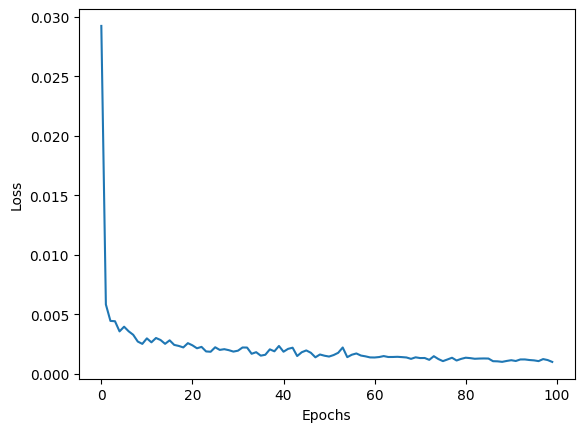

In [22]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:

from google.colab import files
test_data = pd.read_csv('test_data.csv')

In [24]:
test_data.drop(columns='Unnamed: 0', inplace=True)

In [25]:
real_stock_price = test_data.iloc[: , 3:4].values

In [26]:
test_data

,Date,Close/Last,Volume,Open,High,Low
0,2016-06-02,97.720,40170200,97.60,97.84,96.630
1,2016-06-01,98.460,29139100,99.02,99.54,98.330
2,2016-05-31,99.860,42268040,99.60,100.40,98.820
3,2016-05-27,100.350,36299460,99.44,100.47,99.245
4,2016-05-26,100.410,56293490,99.68,100.73,98.640
...,...,...,...,...,...,...
254,2015-06-01,130.535,32016020,131.20,131.39,130.050
255,2015-05-29,130.280,50474170,131.23,131.45,129.900
256,2015-05-28,131.780,30678840,131.86,131.95,131.100
257,2015-05-27,132.045,45771120,130.34,132.26,130.050


In [27]:
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 259):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
predicted_stock_price = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [29]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

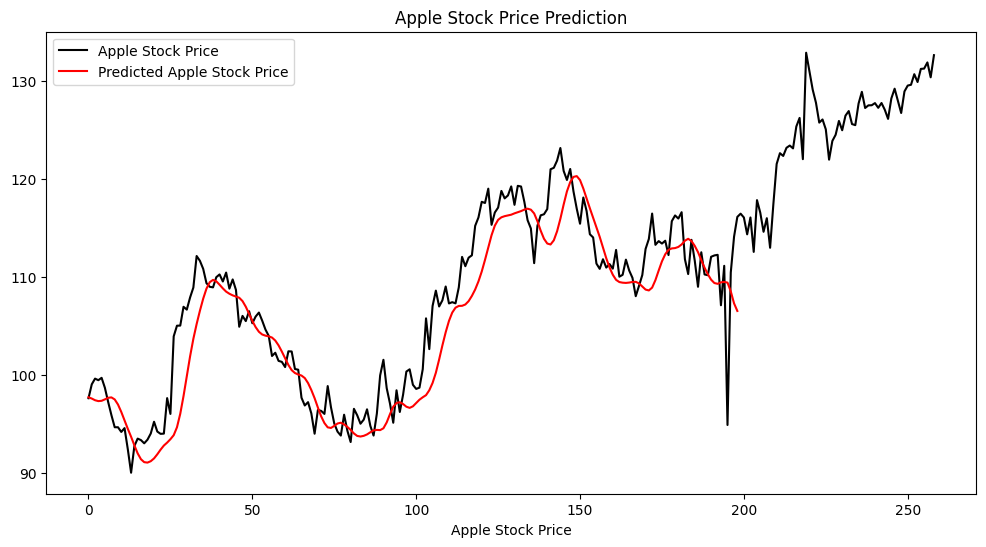

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()

In [8]:
! pip install gradio

Defaulting to user installation because normal site-packages is not writeable


In [5]:
! pip install gradio
import gradio as gr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import datetime

def predict_stock(stock_symbol, start_date, end_date, forecast_horizon):
    # Convert date strings to datetime objects
    start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d').date()
    end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d').date()

    # Step 1: Fetch historical stock data
    df = yf.download(stock_symbol, start=start_date, end=end_date)
    if df.empty:
        return "Error: No data found for this symbol and date range.", None

    df = df['Close'].fillna(method='ffill')

    # Step 2: Preprocess (already filled missing; could normalize here)
    series = df.values
    model = ARIMA(series, order=(5, 1, 0))  # Dummy ARIMA config
    model_fit = model.fit()

    # Step 3: Forecast
    forecast = model_fit.forecast(steps=int(forecast_horizon))

    # Step 4: Visualization
    fig, ax = plt.subplots()
    ax.plot(df.index, df.values, label='Historical')
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=int(forecast_horizon), freq='B')
    ax.plot(future_dates, forecast, label='Forecast', color='red')
    ax.set_title(f"{stock_symbol} Stock Price Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Step 5: Dummy interpretability (SHAP placeholder)
    interpretation = f"The prediction is mostly influenced by recent price drops and volatility before {df.index[-1].strftime('%Y-%m-%d')}."

    return interpretation, fig

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# 📈 Real-Time Stock Market Predictor with Gradio")
    gr.Markdown("Enter stock parameters below to predict future prices using ARIMA (replaceable with LSTM/SARIMA).")

    with gr.Row():
        stock_symbol = gr.Textbox(label="Stock Symbol (e.g., AAPL)", value="AAPL")
        forecast_horizon = gr.Slider(5, 30, step=1, label="Forecast Horizon (Days)", value=10)

    with gr.Row():
        start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.date.today() - datetime.timedelta(days=180)).strftime('%Y-%m-%d'))
        end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.date.today().strftime('%Y-%m-%d'))

    predict_btn = gr.Button("Predict")

    output_text = gr.Textbox(label="Interpretation")
    output_plot = gr.Plot(label="Forecasted Stock Price")

    predict_btn.click(fn=predict_stock,
                      inputs=[stock_symbol, start_date, end_date, forecast_horizon],
                      outputs=[output_text, output_plot])

demo.launch()

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'gradio'

SyntaxError: invalid syntax (3952197928.py, line 1)